# Comparación de rendimiento entre algoritmos de ordenamiento

En esta clase vamos a comparar dos algoritmos que vimos la semana pasada:

- **Bubble Sort**
- **Merge Sort**

Haremos la comparación de dos maneras:

1. **Midiendo el tiempo de ejecución** usando la librería `time`.  
   Esto nos permite ver el rendimiento *real* al ejecutar el código.

2. **Contando operaciones realizadas por cada algoritmo**,  
   lo cual nos permite visualizar su *complejidad algorítmica* teórica.

De esta forma entenderemos:

- Por qué *Merge Sort* escala mejor para arreglos grandes.  
- Por qué *Bubble Sort* es mucho más lento aunque para arreglos pequeños pueda no notarse.  
- Cómo usar herramientas de medición en Python que serán útiles para sus proyectos.


In [1]:
def bubble_sort_contador(arr):
    a = arr.copy()
    n = len(a)
    operaciones = 0

    for i in range(n):
        for j in range(0, n - i - 1):
            operaciones += 1  # comparación
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                operaciones += 1  # intercambio

    return a, operaciones


In [2]:
def merge_contador(left, right):
    i = j = 0
    resultado = []
    operaciones = 0

    while i < len(left) and j < len(right):
        operaciones += 1  # comparación
        if left[i] <= right[j]:
            resultado.append(left[i])
            i += 1
        else:
            resultado.append(right[j])
            j += 1

    resultado.extend(left[i:])
    resultado.extend(right[j:])

    return resultado, operaciones


def merge_sort_contador(arr):
    if len(arr) <= 1:
        return arr, 0

    mid = len(arr) // 2
    izquierda, op_i = merge_sort_contador(arr[:mid])
    derecha, op_d = merge_sort_contador(arr[mid:])

    combinado, op_m = merge_contador(izquierda, derecha)

    return combinado, op_i + op_d + op_m


In [3]:
import time
import random

def medir_tiempo(func, arr):
    inicio = time.time()
    func(arr)
    fin = time.time()
    return fin - inicio


In [ ]:
# Generemos un arreglo aleatorio
n = 3000  # puedes ajustar este valor 
arr = [random.randint(0, 10000) for _ in range(n)]

# Medimos tiempo real
t_bubble = medir_tiempo(bubble_sort_contador, arr)
t_merge  = medir_tiempo(merge_sort_contador, arr)

# Contamos operaciones
_, op_bubble = bubble_sort_contador(arr)
_, op_merge  = merge_sort_contador(arr)

print("===== TIEMPOS =====")
print(f"Bubble Sort: {t_bubble:.5f} s")
print(f"Merge Sort:  {t_merge:.5f} s")

print("\n===== OPERACIONES =====")
print(f"Bubble Sort: {op_bubble}")
print(f"Merge Sort:  {op_merge}")


===== TIEMPOS =====
Bubble Sort: 0.44082 s
Merge Sort:  0.00509 s

===== OPERACIONES =====
Bubble Sort: 6723248
Merge Sort:  30953


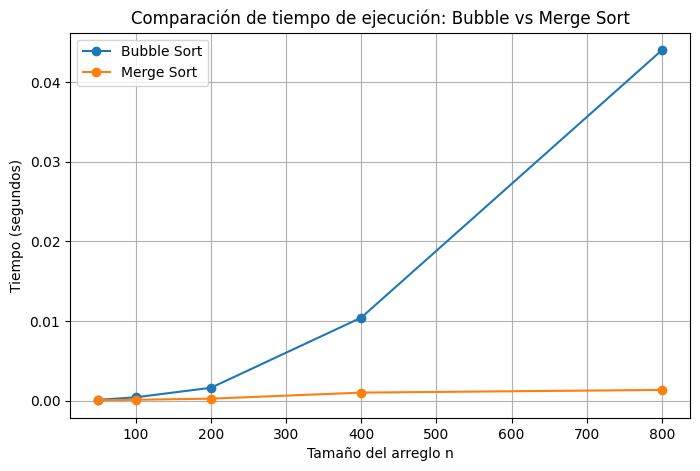

In [5]:
import matplotlib.pyplot as plt
import random
import time

# Rangos de tamaños
ns = [50, 100, 200, 400, 800]

tiempos_bubble = []
tiempos_merge = []


for n in ns:
    arr = [random.randint(0, 10000) for _ in range(n)]

    # medir tiempos
    t_b = medir_tiempo(bubble_sort_contador, arr)
    t_m = medir_tiempo(merge_sort_contador, arr)

    tiempos_bubble.append(t_b)
    tiempos_merge.append(t_m)


plt.figure(figsize=(8,5))
plt.plot(ns, tiempos_bubble, marker='o', label="Bubble Sort")
plt.plot(ns, tiempos_merge, marker='o', label="Merge Sort")
plt.xlabel("Tamaño del arreglo n")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempo de ejecución: Bubble vs Merge Sort")
plt.legend()
plt.grid(True)
plt.show()


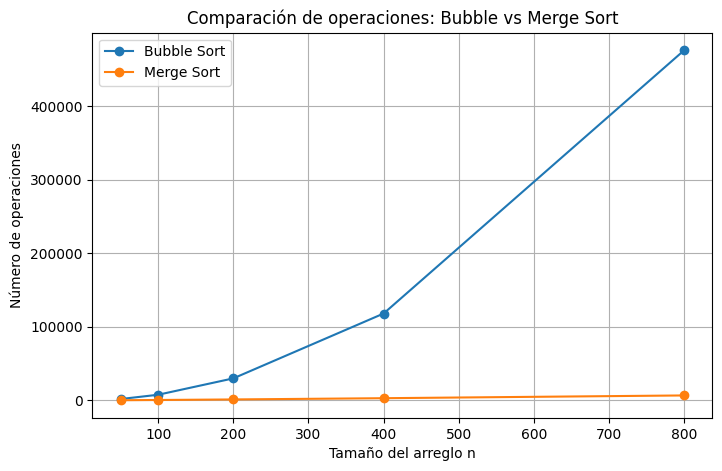

In [6]:
operaciones_bubble = []
operaciones_merge = []

for n in ns:
    arr = [random.randint(0, 10000) for _ in range(n)]
    _, op_b = bubble_sort_contador(arr)
    _, op_m = merge_sort_contador(arr)
    
    operaciones_bubble.append(op_b)
    operaciones_merge.append(op_m)

plt.figure(figsize=(8,5))
plt.plot(ns, operaciones_bubble, marker='o', label="Bubble Sort")
plt.plot(ns, operaciones_merge, marker='o', label="Merge Sort")
plt.xlabel("Tamaño del arreglo n")
plt.ylabel("Número de operaciones")
plt.title("Comparación de operaciones: Bubble vs Merge Sort")
plt.legend()
plt.grid(True)
plt.show()


## Ajuste visual con curvas teóricas

Además de medir tiempos y contar operaciones, vamos a:

- Graficar los datos **reales** de tiempo / operaciones para Bubble Sort y Merge Sort.
- Superponer las curvas teóricas:
  - $a \, n^2$ (crecimiento cuadrático)
  - $b \, n \log n$ (crecimiento casi lineal-logarítmico)
- Ajustar los parámetros $a$ y $b$ con sliders.

La idea es ver cómo, cambiando solo la escala (los parámetros $a$ y $b$), las curvas teóricas se pueden “pegar” bastante bien a los datos observados.

Esto nos ayuda a:

- Relacionar la **teoría** ($O(n^2)$ y $O(n\log n)$) con los **datos experimentales**.
- Entender que la complejidad describe la *forma* del crecimiento, no los valores exactos.


In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Tamaños de prueba
ns = [50, 100, 200, 400, 800]

tiempos_bubble = []
tiempos_merge = []
operaciones_bubble = []
operaciones_merge = []

for n in ns:
    arr = [random.randint(0, 10000) for _ in range(n)]

    # tiempos
    t_b = medir_tiempo(bubble_sort_contador, arr)
    t_m = medir_tiempo(merge_sort_contador, arr)

    tiempos_bubble.append(t_b)
    tiempos_merge.append(t_m)

    # operaciones
    _, op_b = bubble_sort_contador(arr)
    _, op_m = merge_sort_contador(arr)

    operaciones_bubble.append(op_b)
    operaciones_merge.append(op_m)

ns_array = np.array(ns, dtype=float)


In [10]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

@interact(
    escala_n2=widgets.FloatLogSlider(
        value=1e-7, base=10, min=-10, max=0, step=0.1,
        description='a (n^2)'
    ),
    escala_nlogn=widgets.FloatLogSlider(
        value=1e-6, base=10, min=-10, max=0, step=0.1,
        description='b (n log n)'
    )
)
def grafica_tiempo_log(escala_n2, escala_nlogn):
    curva_n2 = escala_n2 * (ns_array ** 2)
    curva_nlogn = escala_nlogn * (ns_array * np.log2(ns_array))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ---- Gráfica normal ----
    axes[0].plot(ns_array, tiempos_bubble, 'o-', label="Bubble Sort")
    axes[0].plot(ns_array, tiempos_merge, 'o-', label="Merge Sort")
    axes[0].plot(ns_array, curva_n2, '--', label=r"$a\,n^2$")
    axes[0].plot(ns_array, curva_nlogn, '--', label=r"$b\,n\log n$")
    axes[0].set_title("Tiempo vs n (escala normal)")
    axes[0].set_xlabel("n")
    axes[0].set_ylabel("Tiempo (s)")
    axes[0].grid(True)
    axes[0].legend()

    # ---- Gráfica logarítmica ----
    axes[1].plot(ns_array, tiempos_bubble, 'o-', label="Bubble Sort")
    axes[1].plot(ns_array, tiempos_merge, 'o-', label="Merge Sort")
    axes[1].plot(ns_array, curva_n2, '--', label=r"$a\,n^2$")
    axes[1].plot(ns_array, curva_nlogn, '--', label=r"$b\,n\log n$")
    axes[1].set_yscale("log")
    axes[1].set_title("Tiempo vs n (escala log en eje vertical)")
    axes[1].set_xlabel("n")
    axes[1].set_ylabel("Tiempo (s, log)")
    axes[1].grid(True, which="both", ls="--")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


interactive(children=(FloatLogSlider(value=1e-07, description='a (n^2)', max=0.0, min=-10.0), FloatLogSlider(v…

In [11]:
@interact(
    escala_n2=widgets.FloatLogSlider(
        value=1e-1, base=10, min=-5, max=5, step=0.1,
        description='a (n^2)'
    ),
    escala_nlogn=widgets.FloatLogSlider(
        value=1e-1, base=10, min=-5, max=5, step=0.1,
        description='b (n log n)'
    )
)
def grafica_operaciones_log(escala_n2, escala_nlogn):
    curva_n2 = escala_n2 * (ns_array ** 2)
    curva_nlogn = escala_nlogn * (ns_array * np.log2(ns_array))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ---- Gráfica normal ----
    axes[0].plot(ns_array, operaciones_bubble, 'o-', label="Ops Bubble Sort")
    axes[0].plot(ns_array, operaciones_merge, 'o-', label="Ops Merge Sort")
    axes[0].plot(ns_array, curva_n2, '--', label=r"$a\,n^2$")
    axes[0].plot(ns_array, curva_nlogn, '--', label=r"$b\,n\log n$")
    axes[0].set_title("Operaciones vs n (escala normal)")
    axes[0].set_xlabel("n")
    axes[0].set_ylabel("Operaciones")
    axes[0].grid(True)
    axes[0].legend()

    # ---- Gráfica logarítmica ----
    axes[1].plot(ns_array, operaciones_bubble, 'o-', label="Ops Bubble Sort")
    axes[1].plot(ns_array, operaciones_merge, 'o-', label="Ops Merge Sort")
    axes[1].plot(ns_array, curva_n2, '--', label=r"$a\,n^2$")
    axes[1].plot(ns_array, curva_nlogn, '--', label=r"$b\,n\log n$")
    axes[1].set_yscale("log")
    axes[1].set_title("Operaciones vs n (escala log en eje vertical)")
    axes[1].set_xlabel("n")
    axes[1].set_ylabel("Operaciones (log)")
    axes[1].grid(True, which="both", ls="--")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


interactive(children=(FloatLogSlider(value=0.1, description='a (n^2)', max=5.0, min=-5.0), FloatLogSlider(valu…

# Discusión de los resultados

En esta comparación observamos dos cosas:

### **1. Tiempo real de ejecución**
`Bubble Sort` tarda mucho más porque su complejidad es:

- $O(n^2)$ comparaciones e intercambios.

Mientras que `Merge Sort` tiene complejidad:

- $O(n \log n)$

Para valores de $n$ grandes, la diferencia es abismal.

### **2. Número de operaciones**
El contador refleja de forma clara la diferencia teórica:

- Bubble Sort realiza aproximadamente $\frac{n^2}{2}$ comparaciones.
- Merge Sort realiza alrededor de $n \log n$ comparaciones.

Esto nos ayuda a entender por qué Merge Sort escala mucho mejor cuando $n$ crece.

### **Conclusión**

- **Bubble Sort** es útil solo para entender la idea de ordenamiento básico.  
- **Merge Sort** es un algoritmo eficiente que se usa en la práctica.  
- Medir tiempo y operaciones es una herramienta esencial para evaluar algoritmos en programación real.


# Reflexión final

A continuación se presentan las preguntas y sus respuestas para entender mejor la relación entre el número de operaciones, los tiempos de ejecución y la complejidad computacional.


### **1. ¿Qué representa realmente “el número de operaciones”?**

El número de operaciones representa una *medida abstracta* de cuántas comparaciones, asignaciones o pasos elementales realiza un algoritmo al ejecutarse.  
No corresponde a unidades físicas como segundos o ciclos de CPU, sino a una estimación matemática del **trabajo computacional** que realiza un algoritmo conforme crece el tamaño de entrada $n$.

Esto permite comparar algoritmos sin depender de una computadora específica.

### **2. ¿Por qué los tiempos pueden variar aunque el número de operaciones sea similar?**

Porque el tiempo medido depende de muchos factores que **no aparecen en la complejidad teórica**, por ejemplo:

- La velocidad del procesador  
- La carga actual del sistema operativo  
- La eficiencia del intérprete de Python  
- Cachés, RAM, ancho de banda y jerarquía de memoria  
- Optimización del compilador  
- Cómo están distribuidos los datos en memoria  

Dos algoritmos con el mismo número de operaciones pueden tardar tiempos distintos simplemente porque realizan operaciones que cuestan diferente o porque afectan la memoria de formas distintas.

### **3. ¿Por qué la complejidad no intenta predecir un número exacto de operaciones?**

Porque la complejidad describe el **comportamiento asintótico**, es decir, la *forma del crecimiento* cuando $n$ es grande, y no valores exactos.

Buscar predicciones exactas no es útil porque:

- Diferentes computadoras dan números distintos  
- Diferentes lenguajes de programación producen diferentes costos  
- El tiempo real cambia de ejecución a ejecución  
- Los algoritmos pueden tener constantes ocultas o “trucos” específicos  
- Las diferencias exactas de tiempo no representan mejor el rendimiento a gran escala

La complejidad computacional abstrae todo eso y se queda solo con una idea robusta:  
> Cómo crece el esfuerzo requerido cuando el tamaño de entrada aumenta.

Por eso hablamos de $O(n)$, $O(n\log n)$, $O(n^2)$, etc., en lugar de números exactos.


## Ejercicio — Contando **todas** las operaciones elementales

Hasta ahora solo hemos contado algunas operaciones (por ejemplo, comparaciones e intercambios).  
Sin embargo, en análisis algorítmico se consideran **todas las operaciones elementales**, es decir, aquellas que el modelo RAM asume que toman tiempo constante:

- Asignaciones  
- Comparaciones  
- Sumas, restas, multiplicaciones, divisiones  
- Accesos a arreglos (lectura y escritura)  
- Operaciones lógicas (`and`, `or`, `not`)  
- Incrementos de índices (`i += 1`)  
- Concatenaciones simples  
- Evaluación de condiciones en `if` y `while`  
- Creación de variables temporales  

### **Tarea**
Modifica tus funciones `bubble_sort_contador` y `merge_sort_contador` para que:

1. Cuenten **todas** las operaciones elementales mencionadas arriba.  
2. Mantengan un contador global o pasado por referencia que se incremente cada vez que uno de estos pasos ocurra.  
3. Devuelvan el total de operaciones elementales realizadas.

*Nota:* Pon como comentario en cada linea de código cuantas operaciones hay. 

### **Preguntas**

1. **¿Qué tanto aumentó el número total de operaciones comparado con la versión anterior?**  
   Explica por qué ocurre este aumento y qué partes del código agregan más operaciones que antes no se contaban.

2. **¿Cambió la forma de la gráfica (n vs operaciones)?**  
   Discute si al contar más operaciones se altera la forma general del crecimiento o si simplemente escala el eje vertical.

3. **¿Se siguen viendo las curvas similares a $n^2$ para Bubble Sort y $n\log n$ para Merge Sort?**  
   Explica por qué la complejidad asintótica no cambia aunque contemos más operaciones.

4. **¿Cuál crees que es la ventaja de contar solo algunas operaciones vs todas?**  
   ¿En qué situaciones es útil cada enfoque?

### **Objetivo**
El objetivo es comprender que:

- Contar más operaciones da una imagen más detallada pero **no cambia la complejidad asintótica**.  
- La forma de crecimiento es lo que importa en ciencias de la computación, no los valores exactos.  
- La complejidad describe tendencias globales, no costos específicos de hardware o de un lenguaje.
